In [17]:
import os
import sys
import math
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [18]:
sns.set_style('darkgrid')

In [83]:
train = pd.read_csv("train_v2.csv")
test = pd.read_csv("test_v2.csv")
validation = pd.read_csv("validation_v2.csv")

In [85]:
Y_train = train[['loc_initiator_x', 'loc_initiator_y']]
X_train = train.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

Y_test = test[['loc_initiator_x', 'loc_initiator_y']]
X_test = test.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

Y_val = validation[['loc_initiator_x', 'loc_initiator_y']]
X_val = validation.drop(["loc_initiator_x",'loc_initiator_y'], axis=1, inplace=False)

In [86]:
parameters = {'max_depth':[3,6,9,12,20,30],
              'n_estimators':[1,100,150,200]}
reg = RandomForestRegressor()
clf = GridSearchCV(reg, parameters)
clf.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 6, 9, 12, 20, 30],
                         'n_estimators': [1, 100, 150, 200]})

In [87]:
params_opti = clf.cv_results_['params'][clf.best_index_]
params_opti

{'max_depth': 30, 'n_estimators': 100}

In [88]:
reg = RandomForestRegressor(max_depth = params_opti['max_depth'], n_estimators = params_opti['n_estimators'])
reg = reg.fit(X_train, Y_train)
pred_test=reg.predict(X_test)
pred_val=reg.predict(X_val)

In [89]:
print("mae test : ", mean_absolute_error(Y_test, pred_test))
print("rmse test : ", np.sqrt(mean_squared_error(Y_test,pred_test)))
print("mae validation : ", mean_absolute_error(Y_val, pred_val))
print("rmse validation : ", np.sqrt(mean_squared_error(Y_val,pred_val)))

mae test :  1.3493355878186981
rmse test :  1.7730410262508787
mae validation :  0.318311321452588
rmse validation :  0.5820709847233342


In [90]:
reg.score(X_test,Y_test)

-0.49891526514149453

In [91]:
reg.score(X_val,Y_val)

0.8261673680135175

In [92]:
pd.Series(reg.feature_importances_, index=list(X_train.columns))

nlos_indicator    0.020746
t1                0.001204
t2                0.001249
t3                0.001322
t4                0.001226
skew              0.106312
tof               0.212820
tof_skew          0.051342
range             0.190909
range_skew        0.050871
loc_target_x      0.014396
loc_target_y      0.006043
rssi_request      0.013071
rssi_ack          0.007426
rssi_data         0.015605
rssi_mean         0.015028
label_0           0.003284
label_1           0.000000
label_2           0.058107
label_3           0.159557
label_4           0.001090
label_5           0.006710
orientation       0.061682
dtype: float64

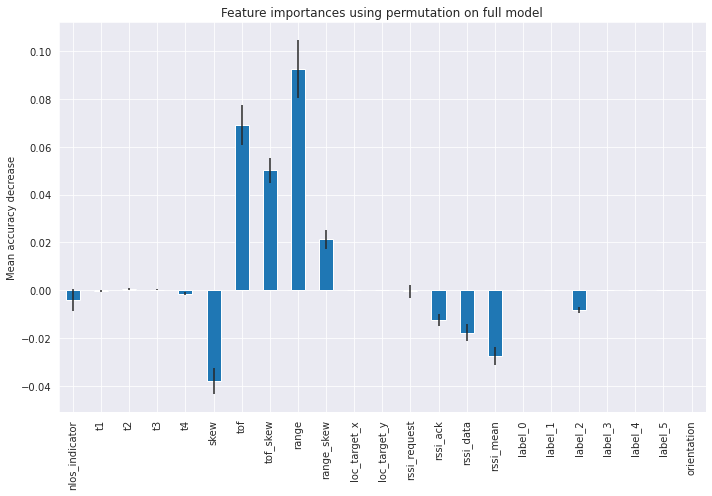

In [93]:
result = permutation_importance(reg, X_test, Y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=list(X_train.columns))

fig, ax = plt.subplots(figsize=(10, 7))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()